# Malnutrition detection 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
malnutrition = pd.read_csv('Malnutrition data.csv')

In [3]:
df = malnutrition

In [4]:
malnutrition.head()

,Sex,Age,Height,Weight,Low Income,Lower Middle Income,Upper Middle Income,Status
0,1,5,75,17,1,0,0,Stunting
1,0,4,101,13,1,0,0,Stunting
2,0,4,71,17,1,0,0,Stunting
3,0,3,81,13,0,0,1,Stunting
4,0,1,79,16,0,0,1,Stunting


In [5]:
# Checking the number of entries and any missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sex                  837 non-null    int64 
 1   Age                  837 non-null    int64 
 2   Height               837 non-null    int64 
 3   Weight               837 non-null    int64 
 4   Low Income           837 non-null    int64 
 5   Lower Middle Income  837 non-null    int64 
 6   Upper Middle Income  837 non-null    int64 
 7   Status               837 non-null    object
dtypes: int64(7), object(1)
memory usage: 52.4+ KB


In [7]:
# Dealing with categorical data

In [8]:
df['Sex'].value_counts()

1    421
0    416
Name: Sex, dtype: int64

In [9]:
df['Status'].value_counts()

Stunting       696
Overweight      94
Underweight     43
Wasting          4
Name: Status, dtype: int64

In [10]:
df.describe()

,Sex,Age,Height,Weight,Low Income,Lower Middle Income,Upper Middle Income
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,0.502987,2.947431,88.559140,14.463560,0.227001,0.397849,0.291517
std,0.500290,1.406447,10.821536,3.457559,0.419144,0.489747,0.454733
min,0.000000,1.000000,70.000000,9.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,80.000000,11.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,89.000000,15.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,98.000000,17.000000,0.000000,1.000000,1.000000
max,1.000000,5.000000,107.000000,20.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Low Income'}>,
        <Axes: title={'center': 'Lower Middle Income'}>],
       [<Axes: title={'center': 'Upper Middle Income'}>, <Axes: >,
        <Axes: >]], dtype=object)

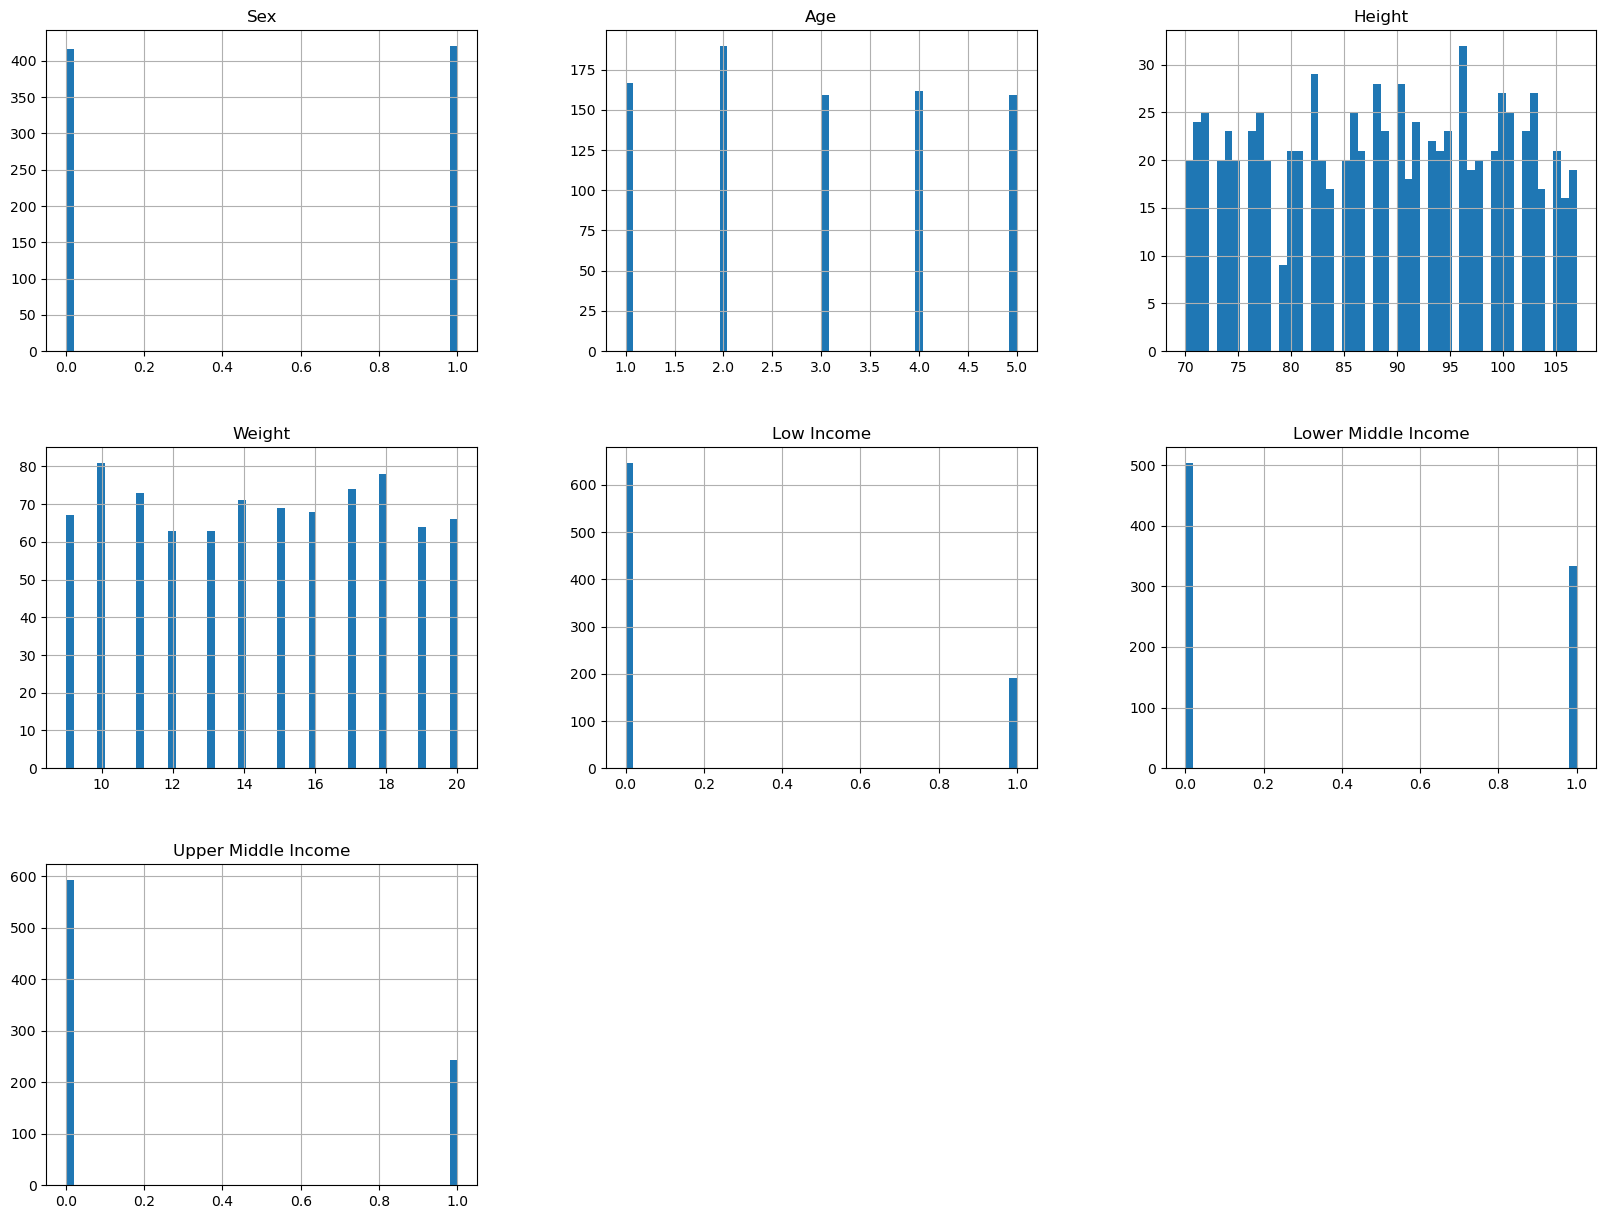

In [11]:
df.hist(bins=50, figsize=(20,15))

In [12]:
# Visualising informaiton about the Status column which is categorical data

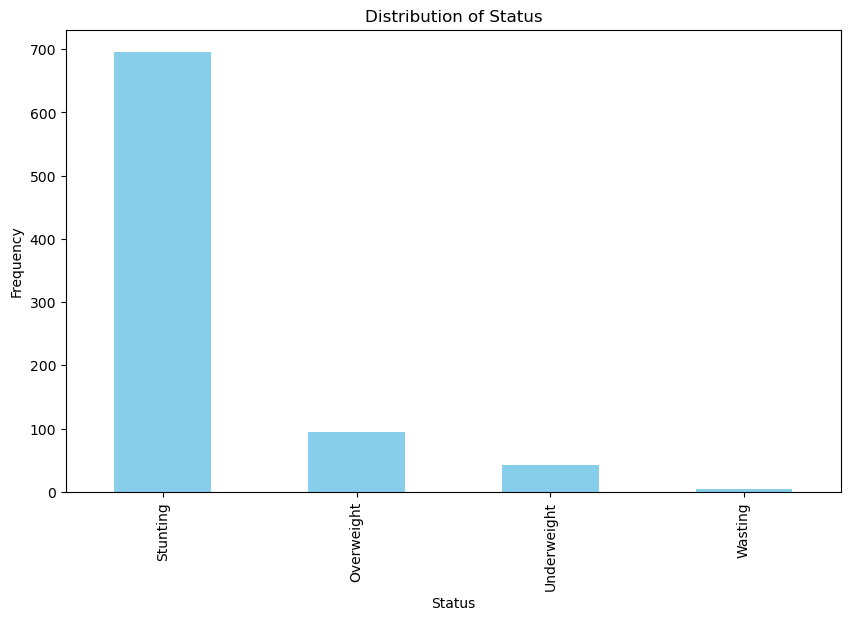

In [13]:
df['Status'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()

In [14]:
print(df.columns)

Index(['Sex', 'Age', 'Height', 'Weight', 'Low Income', 'Lower Middle Income',
       'Upper Middle Income', 'Status'],
      dtype='object')


In [15]:
# Removing the unwanted columns as seen below:

In [16]:
df = df.drop('Low Income '.strip(), axis=1)
df = df.drop('Lower Middle Income '.strip(), axis=1)
df = df.drop('Upper Middle Income '.strip(), axis=1)

In [17]:
df.describe()

,Sex,Age,Height,Weight
count,837.000000,837.000000,837.000000,837.000000
mean,0.502987,2.947431,88.559140,14.463560
std,0.500290,1.406447,10.821536,3.457559
min,0.000000,1.000000,70.000000,9.000000
25%,0.000000,2.000000,80.000000,11.000000
50%,1.000000,3.000000,89.000000,15.000000
75%,1.000000,4.000000,98.000000,17.000000
max,1.000000,5.000000,107.000000,20.000000


In [18]:
# Separating the labels and features

In [19]:
X = df.drop("Status", axis=1)  # Features
y = df["Status"]  # Labels

# X = df.iloc[:, :4]
# y = df.iloc[:, 4]

In [20]:
# Visualising the interger type data using a histogram

array([[<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

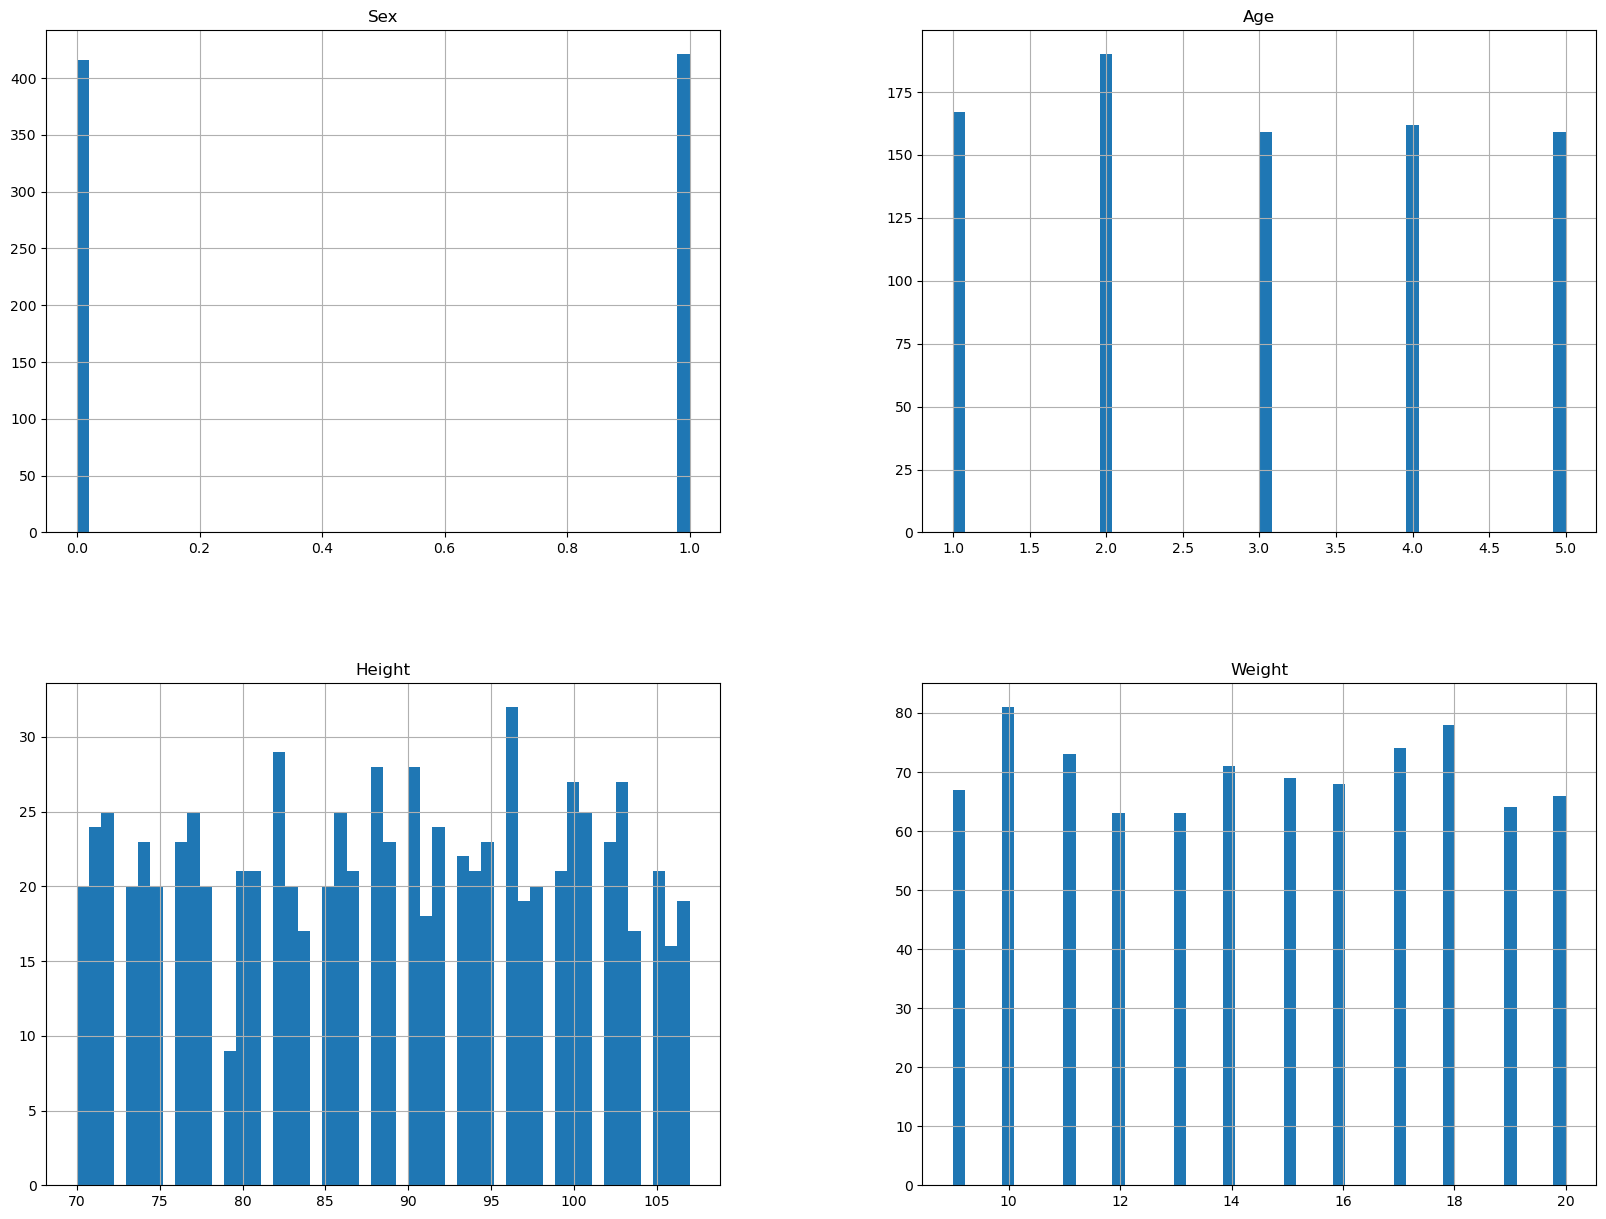

In [21]:
df.hist(bins=50, figsize=(20,15))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     837 non-null    int64 
 1   Age     837 non-null    int64 
 2   Height  837 non-null    int64 
 3   Weight  837 non-null    int64 
 4   Status  837 non-null    object
dtypes: int64(4), object(1)
memory usage: 32.8+ KB


In [23]:
# df_plot = pd.concat([X, y], axis=1)

# # Create a box plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df_plot, x='Status', y='Height') 
# plt.title('Box Plot of Age by Status')
# plt.show()

In [24]:
# df_plot = pd.concat([X, y], axis=1)

# # Create box plots for all features
# plt.figure(figsize=(16, 10))
# sns.boxplot(data=df_plot.drop('Status', axis=1))
# plt.title('Box Plots of Features by Status')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# plt.show()

In [25]:
## Splitting the dataset into training, validation and testing

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the 'temp' sets into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (585, 4) (585,)
Validation set: (126, 4) (126,)
Testing set: (126, 4) (126,)


In [28]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=300)
# model.fit(X_train, y_train)

In [29]:
# predict = model.predict(X_temp)
# predict

In [30]:
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# print(confusion_matrix(y_temp, predict))
# print(classification_report(y_temp, predict))
# print("Accuracy Of Our Model Is:-",accuracy_score(y_temp, predict)*100, "%")

In [31]:
# rf_classifier = RandomForestClassifier(random_state=42)

# # Train the classifier on the training set
# rf_classifier.fit(X_train, y_train)

# # Make predictions on the validation set
# y_val_pred = rf_classifier.predict(X_val)

# # Evaluate the accuracy on the validation set
# val_accuracy = accuracy_score(y_val, y_val_pred)*100
# print(f'Validation Accuracy: {val_accuracy:.2f}')

# # Make predictions on the test set
# y_test_pred = rf_classifier.predict(X_test)

# # Evaluate the accuracy on the test set
# test_accuracy = accuracy_score(y_test, y_test_pred)*100
# print(f'Test Accuracy: {test_accuracy:.2f}')

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train the model on the training set
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val, y_val_pred) * 100))

# Predictions on the temporary set
y_temp_pred = model.predict(X_temp)

# Evaluate the model on the temporary set
print("\nTemporary Set:")
print(confusion_matrix(y_temp, y_temp_pred))
print(classification_report(y_temp, y_temp_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_temp, y_temp_pred) * 100))


Validation Set:
[[  2   6   2   0]
 [  5 102   3   0]
 [  1   4   0   0]
 [  0   1   0   0]]
              precision    recall  f1-score   support

  Overweight       0.25      0.20      0.22        10
    Stunting       0.90      0.93      0.91       110
 Underweight       0.00      0.00      0.00         5
     Wasting       0.00      0.00      0.00         1

    accuracy                           0.83       126
   macro avg       0.29      0.28      0.28       126
weighted avg       0.81      0.83      0.82       126

Accuracy: 82.54%

Temporary Set:
[[  2  24   2   0]
 [ 10 193   8   0]
 [  2  10   0   0]
 [  0   1   0   0]]
              precision    recall  f1-score   support

  Overweight       0.14      0.07      0.10        28
    Stunting       0.85      0.91      0.88       211
 Underweight       0.00      0.00      0.00        12
     Wasting       0.00      0.00      0.00         1

    accuracy                           0.77       252
   macro avg       0.25      0.25   

/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train the model on the training set
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = model.predict(X_val)

# Print the predicted labels and compare with the actual labels
print("Predicted Labels:", y_val_pred)
print("Actual Labels   :", y_val.tolist())  # Convert y_val to a list for easy comparison

# Evaluate the model on the validation set
print("Validation Set:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val, y_val_pred) * 100))


Predicted Labels: ['Stunting' 'Stunting' 'Overweight' 'Stunting' 'Overweight' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Underweight' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Overweight' 'Overweight'
 'Stunting' 'Stunting' 'Stunting' 'Underweight' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Overweight'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Underweight' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Underweight'
 'Stunting' 'Stunting'

/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train the model on the training set
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Print the predicted labels and compare with the actual labels
print("Predicted Labels (Test Set):", y_test_pred)
print("Actual Labels (Test Set)   :", y_test.tolist())  # Convert y_test to a list for easy comparison

# Evaluate the model on the test set
print("\nTest Set:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))




Predicted Labels (Test Set): ['Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Overweight' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Overweight' 'Stunting' 'Underweight'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Underweight'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Overweight' 'Stunting' 'Stunting' 'Underweight' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting' 'Stunting'
 'Stunting' 'Stunting' 'Stunting' 'Overweight' 'Stunting' 'Stunting'
 'Stunting' 'Stu

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the 'temp' sets into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create an SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can adjust the kernel and other parameters based on your data

# Train the SVM model on the training set
svm_model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = svm_model.predict(X_val)

# Evaluate the SVM model on the validation set
print("Validation Set:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val, y_val_pred) * 100))

# Predictions on the test set
y_test_pred = svm_model.predict(X_test)

# Evaluate the SVM model on the test set
print("\nTest Set:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))


Validation Set:
[[  0  10   0   0]
 [  0 110   0   0]
 [  0   5   0   0]
 [  0   1   0   0]]
              precision    recall  f1-score   support

  Overweight       0.00      0.00      0.00        10
    Stunting       0.87      1.00      0.93       110
 Underweight       0.00      0.00      0.00         5
     Wasting       0.00      0.00      0.00         1

    accuracy                           0.87       126
   macro avg       0.22      0.25      0.23       126
weighted avg       0.76      0.87      0.81       126

Accuracy: 87.30%

Test Set:
[[  0  18   0]
 [  0 101   0]
 [  0   7   0]]
              precision    recall  f1-score   support

  Overweight       0.00      0.00      0.00        18
    Stunting       0.80      1.00      0.89       101
 Underweight       0.00      0.00      0.00         7

    accuracy                           0.80       126
   macro avg       0.27      0.33      0.30       126
weighted avg       0.64      0.80      0.71       126

Accuracy: 80.16%


/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

In [36]:
# Below, I used neural networks

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load your dataset
data = pd.read_csv('Malnutrition data.csv')

# Encode categorical variable 'Sex' using one-hot encoding
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# Convert 'Status' column to numerical values using label encoding
label_encoder = LabelEncoder()
data['Status'] = label_encoder.fit_transform(data['Status'])

# Split the dataset into features (X) and target variable (y)
X = data.drop('Status', axis=1)
y = data['Status']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network on the training set
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Predictions on the validation set
y_val_pred_prob = model.predict(X_val)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)

# Evaluate the model on the validation set
print("\nValidation Set:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val, y_val_pred) * 100))

# Predictions on the test set
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Evaluate the model on the test set
print("\nTest Set:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))


Epoch 1/10
19/19 [==============================] - 0s 4ms/step - loss: 0.4277 - accuracy: 0.8291 - val_loss: 0.1159 - val_accuracy: 0.8730
Epoch 2/10
19/19 [==============================] - 0s 1ms/step - loss: 0.2082 - accuracy: 0.8291 - val_loss: 0.1307 - val_accuracy: 0.8730
Epoch 3/10
19/19 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8291 - val_loss: 0.1095 - val_accuracy: 0.8730
Epoch 4/10
19/19 [==============================] - 0s 990us/step - loss: 0.2998 - accuracy: 0.8274 - val_loss: 0.1114 - val_accuracy: 0.8730
Epoch 5/10
19/19 [==============================] - 0s 1ms/step - loss: 0.1902 - accuracy: 0.8291 - val_loss: 0.2071 - val_accuracy: 0.8730
Epoch 6/10
19/19 [==============================] - 0s 1ms/step - loss: 0.3033 - accuracy: 0.8291 - val_loss: 0.1083 - val_accuracy: 0.8730
Epoch 7/10
19/19 [==============================] - 0s 1ms/step - loss: 0.2023 - accuracy: 0.8291 - val_loss: 0.2672 - val_accuracy: 0.8571
Epoch 8/10
19/19 [

/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

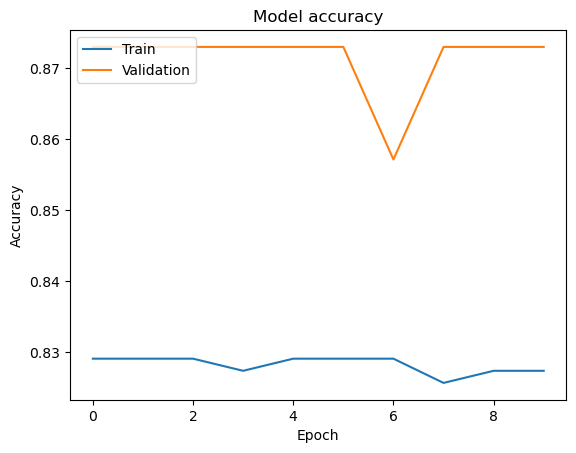

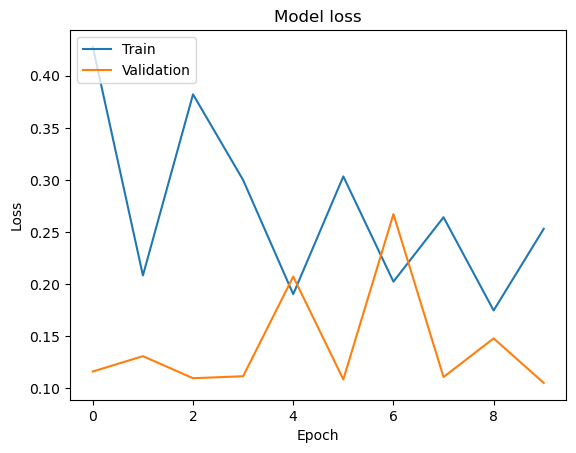

In [38]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [39]:
# In the code below, I encoded the non-numeric label to numeric and used the SVM algorithm 

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming X contains your features and y contains your labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the 'temp' sets into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Encode non-numeric labels in y_train using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create an SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training set
svm_model.fit(X_train, y_train_encoded)

# Encode non-numeric labels in y_val and y_test
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Predictions on the validation set
y_val_pred = svm_model.predict(X_val)

# Evaluate the SVM model on the validation set
print("Validation Set:")
print(confusion_matrix(y_val_encoded, y_val_pred))
print(classification_report(y_val_encoded, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val_encoded, y_val_pred) * 100))

# Predictions on the test set
y_test_pred = svm_model.predict(X_test)

# Evaluate the SVM model on the test set
print("\nTest Set:")
print(confusion_matrix(y_test_encoded, y_test_pred))
print(classification_report(y_test_encoded, y_test_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_encoded, y_test_pred) * 100))



Validation Set:
[[  6   4   0   0]
 [  1 109   0   0]
 [  0   5   0   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.92      0.99      0.96       110
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.91       126
   macro avg       0.42      0.40      0.41       126
weighted avg       0.87      0.91      0.89       126

Accuracy: 91.27%

Test Set:
[[10  8  0]
 [ 5 96  0]
 [ 0  7  0]]
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.86      0.95      0.91       101
           2       0.00      0.00      0.00         7

    accuracy                           0.84       126
   macro avg       0.51      0.50      0.50       126
weighted avg       0.79      0.84      0.81       126

Accuracy: 84.13%


/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

In [41]:
# Below, I encoded the non numeric labels to numeric and used Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'status' is the column to be encoded in your dataset
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)  # Assuming you have a validation set 'y_val'

# Train the model on the training set
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train_encoded)

# Predictions on the test set
y_test_pred_encoded = model.predict(X_test)
y_val_pred_encoded = model.predict(X_val)  # Assuming you have a validation set 'X_val'

# Decode the predicted labels back to original status labels
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)
y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded)

# Print the predicted labels and compare with the actual labels for both test and validation sets
print("Test Set:")
print("Predicted Labels (Test Set):", y_test_pred)
print("Actual Labels (Test Set)   :", y_test.tolist())  # Convert y_test to a list for easy comparison
print("\nValidation Set:")
print("Predicted Labels (Validation Set):", y_val_pred)
print("Actual Labels (Validation Set)   :", y_val.tolist())  # Convert y_val to a list for easy comparison

# Evaluate the model on the test set
print("\nTest Set:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))

# Evaluate the model on the validation set
print("\nValidation Set:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val, y_val_pred) * 100))


Test Set:
Predicted Labels (Test Set): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]
Actual Labels (Test Set)   : [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Validation Set:
Predicted Labels (Validation Set): [1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 

/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushalsharma/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
## Checking the matching of the numeric values and there corresponding actual label values

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'status' is the column to be encoded in your dataset
label_encoder = LabelEncoder()

# Create a sample DataFrame with your data
# Replace this with your actual dataset
data = {'status': ['Stunting', 'Overweight', 'Underweight', 'Wasting', 'Stunting']}
df = pd.DataFrame(data)

# Fit and transform the LabelEncoder on the original label column
encoded_labels = label_encoder.fit_transform(df['status'])

# Print the mapping between encoded values and original labels
print("Encoded Labels:")
for label, encoded_value in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"Encoded Value: {encoded_value} -> Original Label: {label}")


Encoded Labels:
Encoded Value: 0 -> Original Label: Overweight
Encoded Value: 1 -> Original Label: Stunting
Encoded Value: 2 -> Original Label: Underweight
Encoded Value: 3 -> Original Label: Wasting


In [45]:
## Trying out SMOTE

In [46]:
# pip install -U imbalanced-learn

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the 'temp' sets into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Before SMOTE - Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

# Check the number of samples in the minority class
min_class_samples = min(y_train.value_counts())

# Apply SMOTE only to the training set with k_neighbors
k_neighbors = min(6, min_class_samples - 1)  # Ensure k_neighbors is less than min_class_samples
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the shapes of the resampled training set
print("\nAfter SMOTE - Resampled Training set:", X_train_resampled.shape, y_train_resampled.shape)





Before SMOTE - Training set: (585, 7) (585,)
Validation set: (126, 7) (126,)
Testing set: (126, 7) (126,)

After SMOTE - Resampled Training set: (1940, 7) (1940,)


In [48]:
# Print the distribution of the target variable before and after SMOTE
print("Before SMOTE - Training set:")
print(y_train.value_counts())

# Print the distribution of the target variable after SMOTE
print("\nAfter SMOTE - Resampled Training set:")
print(y_train_resampled.value_counts())

# Print the distribution of the target variable in the validation set
print("\nValidation set:")
print(y_val.value_counts())

# Print the distribution of the target variable in the testing set
print("\nTesting set:")
print(y_test.value_counts())


Before SMOTE - Training set:
1    485
0     66
2     31
3      3
Name: Status, dtype: int64

After SMOTE - Resampled Training set:
1    485
0    485
2    485
3    485
Name: Status, dtype: int64

Validation set:
1    110
0     10
2      5
3      1
Name: Status, dtype: int64

Testing set:
1    101
0     18
2      7
Name: Status, dtype: int64


In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the 'temp' sets into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Before SMOTE - Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

# Check the number of samples in the minority class
min_class_samples = min(y_train.value_counts())

# Apply SMOTE only to the training set with k_neighbors
k_neighbors = min(6, min_class_samples - 1)  # Ensure k_neighbors is less than min_class_samples
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Remove unwanted features from all sets
columns_to_remove = ["Low Income", "Lower Middle Income", "Upper Middle Income"]
X_train_resampled = X_train_resampled.drop(columns=columns_to_remove, axis=1)
X_val = X_val.drop(columns=columns_to_remove, axis=1)
X_test = X_test.drop(columns=columns_to_remove, axis=1)

# Print the shapes of the resampled training set
print("\nAfter SMOTE - Resampled Training set:", X_train_resampled.shape, y_train_resampled.shape)

# Continue with your modeling and evaluation steps


Before SMOTE - Training set: (585, 7) (585,)
Validation set: (126, 7) (126,)
Testing set: (126, 7) (126,)

After SMOTE - Resampled Training set: (1940, 4) (1940,)


In [50]:
# List of columns to be removed
columns_to_remove = ["Low Income", "Lower Middle Income", "Upper Middle Income"]

# Remove the specified columns from the DataFrame
X_train_resampled_filtered = X_train_resampled.drop(columns=columns_to_remove, axis=1)

# Display the resulting DataFrame
print(X_train_resampled_filtered.head())


KeyError: "['Low Income', 'Lower Middle Income', 'Upper Middle Income'] not found in axis"

In [ ]:
# Display the first few rows of the modified feature DataFrame
print("Features after removing columns:")
print(X_train_resampled_filtered.head())

# Display the column names of the modified feature DataFrame
print("\nFeature column names after removing columns:")
print(X_train_resampled_filtered.columns)

# Display the target variable (labels) in the modified training set
print("\nLabels in the modified training set:")
print(y_train_resampled.head())


In [ ]:
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)


In [ ]:
# Removing unwanted features from the dataset

In [ ]:
# import pandas as pd

# # Assuming your original dataset is df
# # List of columns to be removed
# columns_to_remove = ["Low Income", "Lower Middle Income", "Upper Middle Income"]

# # Create a new DataFrame with the specified columns removed
# df_filtered = df.drop(columns=columns_to_remove, axis=1)

# # Display the resulting DataFrame
# print(df_filtered.head())




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'status' is the column to be encoded in your dataset
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)  # Assuming you have a validation set 'y_val'

# Train the model on the resampled training set
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train_resampled_filtered, y_train_resampled_encoded)  # Using the filtered feature set

# Predictions on the test set
y_test_pred_encoded = model.predict(X_test)
y_val_pred_encoded = model.predict(X_val)  # Assuming you have a validation set 'X_val'

# Decode the predicted labels back to original status labels
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)
y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded)

# Print the predicted labels and compare with the actual labels for both test and validation sets
print("Test Set:")
print("Predicted Labels (Test Set):", y_test_pred)
print("Actual Labels (Test Set)   :", y_test.tolist())  # Convert y_test to a list for easy comparison
print("\nValidation Set:")
print("Predicted Labels (Validation Set):", y_val_pred)
print("Actual Labels (Validation Set)   :", y_val.tolist())  # Convert y_val to a list for easy comparison

# Evaluate the model on the test set
print("\nTest Set:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))

# Evaluate the model on the validation set
print("\nValidation Set:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val, y_val_pred) * 100))
